# Part I: Logistic Regression Model:


In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [48]:
#A
telco = pd.read_csv("telco_churn_data.csv")
telco.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [49]:
for col in telco:
    print(telco[col].unique())

['8779-QRDMV' '7495-OOKFY' '1658-BYGOY' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
['No' 'Yes']
[ 0  1  6  2  4  3  7  5  8  9 10 11]
[ 1  8 18 25 37 27 58 15  7 11  3 13 16 24  4 32 54  2 21 55  5 20 65 49
 43 56 52 33 30 46  9 10 35 44 62 14 12 17 39 68 34 22 19 23 42 41 57 38
 29 66 69 40 31 59 36 45 53 70 47 50 51 72 26  6 28 48 61 71 60 64 67 63]
['None' 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']
['No' 'Yes']
[ 0.   48.85 11.33 ... 44.99 44.98  8.62]
['No' 'Yes']
['Yes' 'No']
['Fiber Optic' 'Cable' 'DSL' 'None']
[ 9 19 57 13 15 20 33 26 21 32 31 12 10  8 16  2 11  6 14  0 30 29 24 28
 23 22  7 18 25  4  3  5 27 58 17 53 75 56 52 76 64 45 63 62 78 80 84 65
 90 46 43 94 51 48 73 69 71 42 41 59 47 82 85]
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['Month-to-Month' 'One Year' 'Two Year']
['Yes' 'No']
['Bank Withdrawal' 'Credit Card' 'Mailed Check']
[41.236 83.876 99.268 ... 72.    65.45  78.7  ]
[  39.65  633.3  17

*B*

In [50]:
print(telco.dtypes)

Customer ID                           object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless Billing                     object
Payment Method                        object
Monthly Ch

*Numerical--"Number of Referrals", "Tenure in Months","Avg Monthly GB Download", "Avg Monthly Long Distance Charges","Monthly Charge", "Total Regular Charges", "Total Refunds", "Total Extra Data Charges", "Total Long Distance Charges", "Age", "Number of Dependents",  "Latitude", "Longitude", "Population", "CLTV", "Total Customer Svc Requests", "Product/Service Issues Reported".*

*Categorical--Others*

In [51]:
# C
telco['Churn Value'].value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

*We can see that 1869 customers left the company this quarter and 5174 customers remained with the
company. This company's customer churn rate is about 26%.*

*D*

*Location-related variables are "City", "Zip Code", "Latitude", "Longitude", "Population"*

In [52]:
telco=telco.drop(columns=["City", "Zip Code", "Latitude", "Longitude", "Population"])

In [53]:
telco.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Married,Dependents,Number of Dependents,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,Fiber Optic,...,No,No,0,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,Yes,Yes,1,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,No,Yes,3,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,Yes,Yes,1,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,Yes,Yes,1,1,2793,Price,Extra data charges,1,0,2.0


In [54]:
#E
telco=telco.drop(columns=["Internet Type", "Customer ID"])
telco.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,...,Married,Dependents,Number of Dependents,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,No,0,1,None,No,0.00,No,Yes,9,No,...,No,No,0,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,19,No,...,Yes,Yes,1,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,No,0,18,Offer D,Yes,11.33,Yes,Yes,57,No,...,No,Yes,3,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,Yes,1,25,Offer C,Yes,19.76,No,Yes,13,No,...,Yes,Yes,1,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,15,No,...,Yes,Yes,1,1,2793,Price,Extra data charges,1,0,2.0


*(a) A unique identifier like customer ID does not have any inherent relationship with the target variable of interest. It is merely an identifier that assigns a unique label to each customer in the dataset. Since each ID is unique and does not repeat, it cannot be used to identify any patterns or trends in the data that could help predict the target variable.*

*F*

*The churn category and churn reason may not be suitable input variables in a model that predicts whether someone will churn because they are likely to be the outcome or the result of a customer's decision to churn, rather than the factors that lead to that decision.In other words, churn category and churn reason are variables that describe why a customer has already churned, and not necessarily the variables that led to their decision to churn.*

In [55]:
#(a)
telco=telco.drop(columns=["Churn Category", "Churn Reason"])
telco.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,...,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,No,0,1,None,No,0.00,No,Yes,9,No,...,No,Yes,No,No,0,1,5433,5,0,NaN
1,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,19,No,...,No,Yes,Yes,Yes,1,1,5302,5,0,NaN
2,No,0,18,Offer D,Yes,11.33,Yes,Yes,57,No,...,No,Yes,No,Yes,3,1,3179,1,0,NaN
3,Yes,1,25,Offer C,Yes,19.76,No,Yes,13,No,...,No,Yes,Yes,Yes,1,1,5337,1,1,2.0
4,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,15,No,...,No,Yes,Yes,Yes,1,1,2793,1,0,2.0


In [56]:
#G
print(telco.isnull().sum())
missing_percentages = telco.isnull().mean() * 100
variables_to_remove = missing_percentages[missing_percentages > 50].index.tolist()
telco = telco.drop(variables_to_remove, axis=1)

Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Regular Charges                   0
Total Refunds                           0
Total Extra Data Charges          

*Customer_Satisfaction should be dropped*

*(a) It can be dangerous to impute values for variables with a huge percentage of missingness because it can lead to biased or inaccurate results. Imputation methods assume that the missing values are missing at random (MAR) or missing completely at random (MCAR). If the missing values are not MCAR or MAR, then imputation can introduce bias into the data. Additionally, imputing values for variables with a large percentage of missing values can lead to the creation of artificial patterns in the data, which can also lead to biased results.* 

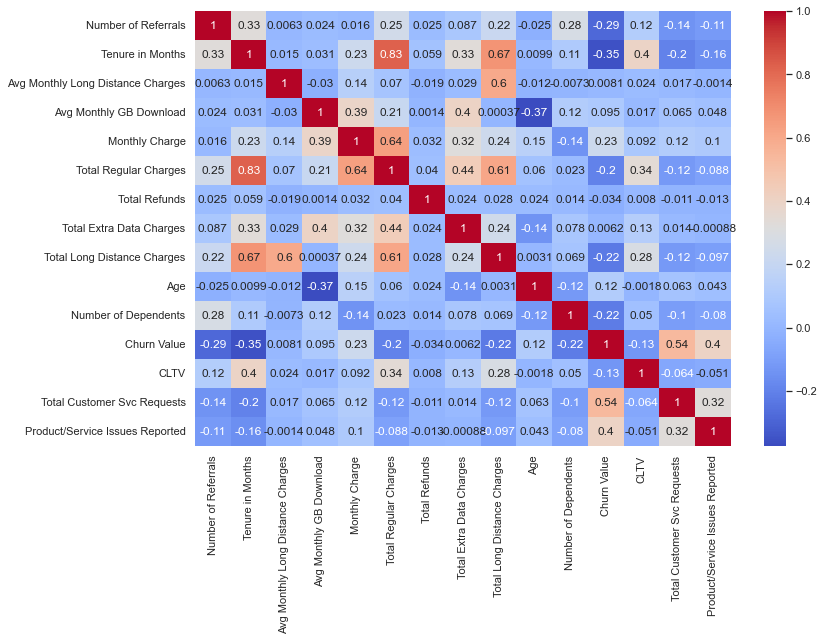

In [57]:
#H(a)
numeric_vars = telco.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = telco[numeric_vars].corr()
sns.set(style="whitegrid", rc={'figure.figsize':(12,8)})
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

In [58]:
#(i)
high_corr_pairs = []
for i in range(len(numeric_vars)):
    for j in range(i+1, len(numeric_vars)):
        if abs(corr_matrix.iloc[i,j]) > 0.7:
            high_corr_pairs.append((numeric_vars[i], numeric_vars[j]))
high_corr_pairs

[('Tenure in Months', 'Total Regular Charges')]

In [59]:
for var1, var2 in high_corr_pairs:
    telco = telco.drop(var2, axis=1)

In [60]:
telco.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,...,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported
0,No,0,1,None,No,0.00,No,Yes,9,No,...,78,No,Yes,No,No,0,1,5433,5,0
1,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,19,No,...,74,No,Yes,Yes,Yes,1,1,5302,5,0
2,No,0,18,Offer D,Yes,11.33,Yes,Yes,57,No,...,71,No,Yes,No,Yes,3,1,3179,1,0
3,Yes,1,25,Offer C,Yes,19.76,No,Yes,13,No,...,78,No,Yes,Yes,Yes,1,1,5337,1,1
4,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,15,No,...,80,No,Yes,Yes,Yes,1,1,2793,1,0


*I*

*Categorical variables that have more than two unique values will require further handling to be dummified for use in a model.In this case,"Offer", "Contract", "Payment Method" need to be dummified.*

In [61]:
#(a)
telco= pd.get_dummies(telco, drop_first=True, columns=["Offer", "Contract", "Payment Method"])

In [126]:
#J
telco.replace({'Yes': 1, 'No': 0}, inplace=True)
telco.replace({'Male': 1, 'Female': 0}, inplace=True)
X = telco.drop('Churn Value', axis=1)

y = telco['Churn Value']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=654)

*(a)My seed value is the code for this course*

In [127]:
#K
grouped_data = telco.groupby('Churn Value').mean()
grouped_data

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Product/Service Issues Reported,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Contract_One Year,Contract_Two Year,Payment Method_Credit Card,Payment Method_Mailed Check
Churn Value,,,,,,,,,,,,,,,,,,,,,
0,0.502126,2.468690,37.591225,0.901044,22.883572,0.409934,0.726904,19.915733,0.333204,0.368380,...,0.135872,0.093738,0.139737,0.061848,0.085234,0.073251,0.267491,0.354658,0.454387,0.046966
1,0.333868,0.521134,17.979133,0.909042,23.167635,0.454789,0.939540,24.419476,0.157838,0.279829,...,0.784912,0.018727,0.054040,0.050829,0.086142,0.227929,0.088818,0.025682,0.212948,0.075976


*(a)Customers who left the company have a higher mean on "Product/Service Issues Reported" and "Monthly Charge". If you are charged more per month and have a lot of problems, it is reasonable to leave the company. As for the "Tenure in Months" shows that the average of the total number of months that lost customers has been with the company is less than that of customers who remain, Therefore, I think these 3 variables will be strongly impactful.*

In [134]:
#L

X = X_train
y = y_train

log_reg=sm.Logit(y, sm.add_constant(X))


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [135]:
#M
result = log_reg.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.214712
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Churn Value   No. Observations:                 4225
Model:                          Logit   Df Residuals:                     4184
Method:                           MLE   Df Model:                           40
Date:                Sat, 25 Mar 2023   Pseudo R-squ.:                  0.6315
Time:                        21:01:26   Log-Likelihood:                -907.16
converged:                       True   LL-Null:                       -2461.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.5769      0.543     -4.749      0.000      -3.640      -1.513
Referred a Friend                     1.4642      0.397      3.689      0.000       0.686       2.242
Number of Referrals                  -0.6771      0.061    -11.018      0.000      -0.798      -0.557
Tenure in Months                     -0.0171      0.007     -2.551      0.011      -0.030      -0.004
Phone Service                        -1.9963      0.362     -5.512      0.000      -2.706      -1.286
Avg Monthly Long Distance Charges    -0.0029      0.006     -0.456      0.648      -0.015       0.009
Multiple Lines                       -0.3911      0.158     -2.481      0.013      -0.700      -0.082
Internet Service                     -1.1948      0.386     -3.095      0.002      -1.951      -0.438
Avg Monthly GB Download               0.0098      0.005      1.942      0.052   -9.28e-05       0.020
Online Security                      -0.6105      0.162     -3.769      0.000      -0.928      -0.293
Online Backup                        -0.5139      0.152     -3.388      0.001      -0.811      -0.217
Device Protection Plan               -0.3030      0.156     -1.945      0.052      -0.609       0.002
Premium Tech Support                 -0.7638      0.161     -4.734      0.000      -1.080      -0.448
Streaming TV                         -0.5246      0.175     -2.998      0.003      -0.868      -0.182
Streaming Movies                     -0.8003      0.279     -2.872      0.004      -1.346      -0.254
Streaming Music                       0.4288      0.261      1.641      0.101      -0.083       0.941
Unlimited Data                       -1.3377      0.152     -8.829      0.000      -1.635      -1.041
Paperless Billing                     0.1522      0.139      1.096      0.273      -0.120       0.425
Monthly Charge                        0.0689      0.007      9.737      0.000       0.055       0.083
Total Refunds                        -0.0186      0.009     -1.969      0.049      -0.037   -8.48e-05
Total Extra Data Charges              0.0001      0.000      1.153      0.249      -0.000       0.000
Total Long Distance Charges        -4.15e-05      0.000     -0.228      0.820      -0.000       0.000
Gender                               -0.0491      0.121     -0.405      0.685      -0.287       0.188
Age                                   0.0102      0.007      1.391      0.164      -0.004       0.025
Under 30                             -0.3109      0.269     -1.154      0.249      -0.839       0.217
Senior Citizen                        0.4668      0.266      1.754      0.079      -0.055       0.988
Married                               0.6382      0.375      1.703      0.089      -0.096       1.373
Dependents                           -1.3812      0.392     -3.526      0.000      -2.149      -0.613
Number of Dependents                 -0.0302      0.157     -0.192      0.848  

*(a)Numeric variables with high p-values: "Avg Monthly Long Distance Charges", "Avg Monthly GB Download", "Total Extra Data Charges", "Total Long Distance Charges", "Age", "Number of Dependents", "CLTV"*

*(b)Categorical variables with high p-values: "Device Protection Plan","Under 30", "Senior Citizen", "Married", "Offer, "Payment Method","Gender","Streaming Music", "Paperless Billing",*

In [147]:
#N
X_2 = telco[["Referred a Friend","Number of Referrals","Tenure in Months", 
                "Phone Service", "Multiple Lines", "Internet Service","Online Security", "Online Backup", 
                "Premium Tech Support", "Streaming TV", "Streaming Movies",
                 "Unlimited Data", "Monthly Charge", "Total Refunds",
                "Dependents","Total Customer Svc Requests", "Product/Service Issues Reported","Contract_One Year", 
                "Contract_Two Year"]]

y_2 = telco['Churn Value']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,y_2, test_size=0.4, random_state=654)

log_reg_2=sm.Logit(y_train_2, sm.add_constant(X_train_2))


In [148]:
#(a)
result_2 = log_reg_2.fit()
result_2.summary()

Optimization terminated successfully.
         Current function value: 0.224999
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Churn Value   No. Observations:                 4225
Model:                          Logit   Df Residuals:                     4205
Method:                           MLE   Df Model:                           19
Date:                Sat, 25 Mar 2023   Pseudo R-squ.:                  0.6138
Time:                        21:10:55   Log-Likelihood:                -950.62
converged:                       True   LL-Null:                       -2461.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -2.0891      0.307     -6.799      0.000      -2.691      -1.487
Referred a Friend                   2.1477      0.190     11.293      0.000       1.775       2.521
Number of Referrals                -0.6762      0.060    -11.286      0.000      -0.794      -0.559
Tenure in Months                   -0.0226      0.004     -5.438      0.000      -0.031      -0.014
Phone Service                      -2.0719      0.321     -6.459      0.000      -2.701      -1.443
Multiple Lines                     -0.4023      0.153     -2.628      0.009      -0.702      -0.102
Internet Service                   -0.7632      0.340     -2.247      0.025      -1.429      -0.097
Online Security                    -0.6638      0.157     -4.241      0.000      -0.971      -0.357
Online Backup                      -0.5247      0.147     -3.564      0.000      -0.813      -0.236
Premium Tech Support               -0.7992      0.154     -5.177      0.000      -1.102      -0.497
Streaming TV                       -0.5088      0.170     -2.991      0.003      -0.842      -0.175
Streaming Movies                   -0.4532      0.169     -2.685      0.007      -0.784      -0.122
Unlimited Data                     -1.4305      0.131    -10.933      0.000      -1.687      -1.174
Monthly Charge                      0.0685      0.006     10.570      0.000       0.056       0.081
Total Refunds                      -0.0198      0.009     -2.136      0.033      -0.038      -0.002
Dependents                         -1.4381      0.203     -7.094      0.000      -1.835      -1.041
Total Customer Svc Requests         0.9231      0.051     17.979      0.000       0.823       1.024
Product/Service Issues Reported     0.8337      0.089      9.381      0.000       0.660       1.008
Contract_One Year                  -1.4300      0.185     -7.741      0.000      -1.792      -1.068
Contract_Two Year                  -2.2338      0.261     -8.561      0.000      -2.745      -1.722
===================================================================================================
"""

In [149]:
#O
log_reg_3 = LogisticRegression()
log_reg_3.fit(X_train_2, y_train_2)
print("Model coefficients: ", log_reg_3.coef_)
print("Model intercept: ", log_reg_3.intercept_)

Model coefficients:  [[ 2.03034925 -0.63834718 -0.02384961 -1.83120102 -0.25887538 -0.25512225
  -0.74959117 -0.49193564 -0.95906905 -0.52250304 -0.44854881 -1.51335452
   0.06224581 -0.01903943 -1.32637507  0.93250902  0.79843432 -1.24480424
  -1.75223849]]
Model intercept:  [-2.32187164]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [157]:
#P
y_pred = log_reg_3.predict(X_test_2)
conf_matrix = confusion_matrix(y_test_2, y_pred)
print(conf_matrix)

[[1968  119]
 [ 164  567]]


In [158]:
#(a) calculate accuracy rate
accuracy_rate = (conf_matrix[0][0] + conf_matrix[1][1]) / sum(sum(conf_matrix))
print("Accuracy rate:", accuracy_rate)

#(b) calculate sensitivity rate
sensitivity_rate = conf_matrix[1][1] / (conf_matrix[1][0] + conf_matrix[1][1])
print("Sensitivity rate:", sensitivity_rate)

#(c) calculate specificity rate
specificity_rate = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])
print("Specificity rate:", specificity_rate)

#(d) calculate precision
precision = conf_matrix[1][1] / (conf_matrix[0][1] + conf_matrix[1][1])
print("Precision:", precision)

#(e) calculate balanced accuracy
balanced_accuracy = (sensitivity_rate + specificity_rate) / 2
print("Balanced accuracy:", balanced_accuracy)

Accuracy rate: 0.8995741660752307
Sensitivity rate: 0.7756497948016415
Specificity rate: 0.9429803545759463
Precision: 0.826530612244898
Balanced accuracy: 0.8593150746887939


In [161]:
#Q
train_accuracy = accuracy_score(y_train_2, log_reg_3.predict(X_train_2))
test_accuracy = accuracy_score(y_test_2, log_reg_3.predict(X_test_2))
print("train accuracy:", train_accuracy)
print("test accuracy:", test_accuracy)

train accuracy: 0.9088757396449704
test accuracy: 0.8995741660752307


*a. The purpose of comparing the accuracy of a model on the training set and test set is to determine if the model is overfitting or underfitting. Overfitting occurs when the model performs well on the training set but poorly on the test set. Underfitting occurs when the model performs poorly on both the training and test sets.*

*b.If the accuracy of the model on the training set is significantly higher than the accuracy on the test set, it suggests that the model is overfitting. This means that the model has learned the training data too well, including the noise and random fluctuations, and cannot generalize well to new, unseen data. In contrast, if the accuracy of the model on the test set is similar to the accuracy on the training set, it suggests that the model is well-generalized and can perform well on new, unseen data. In other words, the model is not overfitting or underfitting.*

In [177]:
#R
new_observation = pd.DataFrame({"Referred a Friend":[0],"Number of Referrals":[0],"Tenure in Months":[18], 
                "Phone Service":[0], "Multiple Lines":[1], "Internet Service":[0],"Online Security":[1], "Online Backup":[1], 
                "Premium Tech Support":[0], "Streaming TV":[1], "Streaming Movies":[0],
                 "Unlimited Data":[0], "Monthly Charge":[84], "Total Refunds":[0],
                "Dependents":[1],"Total Customer Svc Requests":[0], "Product/Service Issues Reported":[0],"Contract_One Year":[1], 
                "Contract_Two Year":[0]})

In [178]:
predicted_class =log_reg_3.predict(new_observation)
print(predicted_class)

[0]


*According to my predict, this customer may not take the return offer*

*S*

*When using a logistic regression model to make predictions, it is important to only use values within the range of the dataset used to build the model because the logistic regression model is trained on the input features and the corresponding output labels of the training dataset. The model learns the relationship between the input features and the output labels of the training dataset and tries to generalize it to new, unseen data.*

In [180]:
#(a) 
new_observation_2 = pd.DataFrame({"Referred a Friend":[0],"Number of Referrals":[0],"Tenure in Months":[100], 
                "Phone Service":[0], "Multiple Lines":[1], "Internet Service":[0],"Online Security":[1], "Online Backup":[1], 
                "Premium Tech Support":[0], "Streaming TV":[1], "Streaming Movies":[0],
                 "Unlimited Data":[0], "Monthly Charge":[84], "Total Refunds":[100],
                "Dependents":[1],"Total Customer Svc Requests":[0], "Product/Service Issues Reported":[0],"Contract_One Year":[1], 
                "Contract_Two Year":[0]})

In [181]:
predicted_class =log_reg_3.predict(new_observation_2)
print(predicted_class)

[0]


*I set the "Tenure in Months"=100，and "Total Refunds"=100 which are both out of range, but it seems to get a predicted result as well, and I have no idea what it should be*

# Part II: Random Forest Model

In [162]:
#T
telco_part2 = pd.read_csv("telco_churn_data.csv")
telco_part2.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [163]:
#U
telco_part2=telco_part2.drop(columns=["City", "Zip Code", "Latitude", "Longitude", "Population","Internet Type", "Customer ID","Churn Category", "Churn Reason", "Customer Satisfaction", "Total Regular Charges"])
telco_part2.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,...,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported
0,No,0,1,None,No,0.00,No,Yes,9,No,...,78,No,Yes,No,No,0,1,5433,5,0
1,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,19,No,...,74,No,Yes,Yes,Yes,1,1,5302,5,0
2,No,0,18,Offer D,Yes,11.33,Yes,Yes,57,No,...,71,No,Yes,No,Yes,3,1,3179,1,0
3,Yes,1,25,Offer C,Yes,19.76,No,Yes,13,No,...,78,No,Yes,Yes,Yes,1,1,5337,1,1
4,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,15,No,...,80,No,Yes,Yes,Yes,1,1,2793,1,0


In [164]:
#V
telco_part2= pd.get_dummies(telco_part2, drop_first=False, columns=["Offer", "Contract", "Payment Method"])

In [165]:
#W
telco_part2.replace({'Yes': 1, 'No': 0}, inplace=True)
telco_part2.replace({'Male': 1, 'Female': 0}, inplace=True)
X_part2 = telco_part2.drop('Churn Value', axis=1)

y_part2 = telco_part2['Churn Value']

X_train_part2, X_test_part2, y_train_part2, y_test_part2 = train_test_split(X_part2,y_part2, test_size=0.4, random_state=654)

In [168]:
#X
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
model = RandomForestClassifier(random_state=654)

# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_part2, y_train_part2)

# Get the best hyperparameters and train the model with them
best_params = grid_search.best_params_
model = RandomForestClassifier(random_state=654, **best_params)
model.fit(X_train_part2, y_train_part2)

RandomForestClassifier(n_estimators=200, random_state=654)

In [173]:
#Y
feature_names=X_train_part2.columns
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]}")

Total Customer Svc Requests: 0.15548800029545584
Product/Service Issues Reported: 0.08277554759848314
Monthly Charge: 0.07873718588108007
Contract_Month-to-Month: 0.06864279186167864
Tenure in Months: 0.06720335002616751
Number of Referrals: 0.047524105137171736
Total Long Distance Charges: 0.04574357063334092
Age: 0.04301500103143074
Avg Monthly GB Download: 0.04155633370033793
CLTV: 0.03842353480570485
Avg Monthly Long Distance Charges: 0.034323092700412686
Total Extra Data Charges: 0.03257088057089847
Contract_Two Year: 0.028983510393768033
Unlimited Data: 0.018338408175618597
Number of Dependents: 0.01575235069353827
Payment Method_Credit Card: 0.013614080248113421
Dependents: 0.012803714084757618
Contract_One Year: 0.01216828139631272
Senior Citizen: 0.011535802753292433
Internet Service: 0.010183798066671973
Premium Tech Support: 0.010091079696053202
Online Security: 0.009911768617771032
Paperless Billing: 0.009104974379561539
Payment Method_Bank Withdrawal: 0.008065087488269257


*Feature importance in a random forest model represents the relative importance of each feature in predicting the target variable. It is calculated by measuring the total reduction in the impurity of the decision trees in the forest when the feature is used for splitting. Features with higher importance values are more influential in the prediction process.This can be useful for feature selection and dimensionality reduction, as we can identify and remove less important features that may be adding noise to the model.*

In [174]:
#Z
y_pred_part2 = model.predict(X_test_part2)
conf_matrix = confusion_matrix(y_test_part2, y_pred_part2)
print(conf_matrix)

[[1998   89]
 [ 165  566]]


In [175]:
#(a) calculate accuracy rate
accuracy_rate = (conf_matrix[0][0] + conf_matrix[1][1]) / sum(sum(conf_matrix))
print("Accuracy rate:", accuracy_rate)

#(b) calculate sensitivity rate
sensitivity_rate = conf_matrix[1][1] / (conf_matrix[1][0] + conf_matrix[1][1])
print("Sensitivity rate:", sensitivity_rate)

#(c) calculate specificity rate
specificity_rate = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])
print("Specificity rate:", specificity_rate)

#(d) calculate precision
precision = conf_matrix[1][1] / (conf_matrix[0][1] + conf_matrix[1][1])
print("Precision:", precision)

#(e) calculate balanced accuracy
balanced_accuracy = (sensitivity_rate + specificity_rate) / 2
print("Balanced accuracy:", balanced_accuracy)

Accuracy rate: 0.9098651525904897
Sensitivity rate: 0.774281805745554
Specificity rate: 0.9573550551030187
Precision: 0.8641221374045801
Balanced accuracy: 0.8658184304242864


In [176]:
#AA
train_accuracy = accuracy_score(y_train_part2, model.predict(X_train_part2))
test_accuracy = accuracy_score(y_test_part2, model.predict(X_test_part2))
print("train accuracy:", train_accuracy)
print("test accuracy:", test_accuracy)

train accuracy: 1.0
test accuracy: 0.9098651525904897


*When the accuracy of the training set is higher than that of the test set, it usually means that the model is overfitted on the training set*

In [185]:
#BB
new_observation = pd.DataFrame({"Referred a Friend":[0],"Number of Referrals":[0],"Tenure in Months":[18], 
                "Phone Service":[0], "Multiple Lines":[1], "Internet Service":[0],"Online Security":[1], "Online Backup":[1], 
                "Premium Tech Support":[0], "Streaming TV":[1], "Streaming Movies":[0],
                 "Unlimited Data":[0], "Monthly Charge":[84], "Total Refunds":[0],
                "Dependents":[1],"Total Customer Svc Requests":[0], "Product/Service Issues Reported":[0],"Contract_One Year":[1], 
                "Contract_Two Year":[0], 'Avg Monthly Long Distance Charges':[6],'Avg Monthly GB Download':[10], 'Device Protection Plan':[0], 
                'Streaming Music':[0],'Paperless Billing':[0], 'Total Extra Data Charges':[0], 'Total Long Distance Charges':[370], 'Gender':[0], 'Age':[70], 
                'Under 30':[1], 'Senior Citizen':[0], 'Married':[0],'Number of Dependents':[1], 'CLTV':[3198], 'Offer_None':[0], 'Offer_Offer A':[1], 
                'Offer_Offer B':[0], 'Offer_Offer C':[0], 'Offer_Offer D':[0], 'Offer_Offer E':[0], 'Contract_Month-to-Month':[0], 
                'Payment Method_Bank Withdrawal':[1], 'Payment Method_Credit Card':[0], 'Payment Method_Mailed Check':[0]       })

In [186]:
col_names = X_train_part2.columns.tolist()
print(col_names)

['Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing', 'Monthly Charge', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents', 'CLTV', 'Total Customer Svc Requests', 'Product/Service Issues Reported', 'Offer_None', 'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E', 'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year', 'Payment Method_Bank Withdrawal', 'Payment Method_Credit Card', 'Payment Method_Mailed Check']


In [187]:
predicted_class =model.predict(new_observation)
print(predicted_class)

[0]


*According to my predict, this customer may not take the return offer*

*CC. For telephone companies,the significance of building logistic regression models is to analyze customer retention is that they can help companies understand customer retention and the factors that affect it so that they can develop strategies and measures to improve customer retention and increase customer loyalty.*

*Logistic regression is a binary model that predicts the probability of an event occurring, such as whether a customer will continue to use a communications company's services in the future. If customer retention is low, then the communications company may need to make adjustments to its products, services, prices, etc. to increase customer satisfaction and loyalty. Logistic regression models can help communications companies identify key factors that affect customer retention, such as the length of time a subscriber uses the service, frequency of use, bill amount, number of complaints, etc., so that they can take targeted measures to improve customer experience and satisfaction, and thus increase customer retention.*

*In addition, logistic regression models can help communication companies identify potentially lost customers and take early measures to retain them, in this case, such as offering more refunds,lower long Distance Charges, etc. The prediction results of logistic regression models can provide communications companies with important business insights and help them develop more effective customer retention strategies to improve performance and market competitiveness*

# Part III: Wildcard

*I was inspired by the recent opening of a hot new Chinese restaurant in Boston called Jiangnan, which has an average wait time of over 2 hours since it opened. Since the Boston location just opened without many reviews, I chose to create a word cloud from the reviews of the Jiangnan location in New York.I randomly selected 20 reviews on yelp with a total of 2896 words and generated a word cloud containing the 60 most frequently occurring words.*

*From the size and color of the words in the word cloud we can easily see that Peking Duck is the specialty of this restaurant. Secondly the fruit and drinks at this restaurant also seem to be very popular as seen in the word cloud. Finally there are some positive reviews in the word cloud like "good", "recommend", "amazing","super", "nice"，this means that the store has a good reputation overall.*

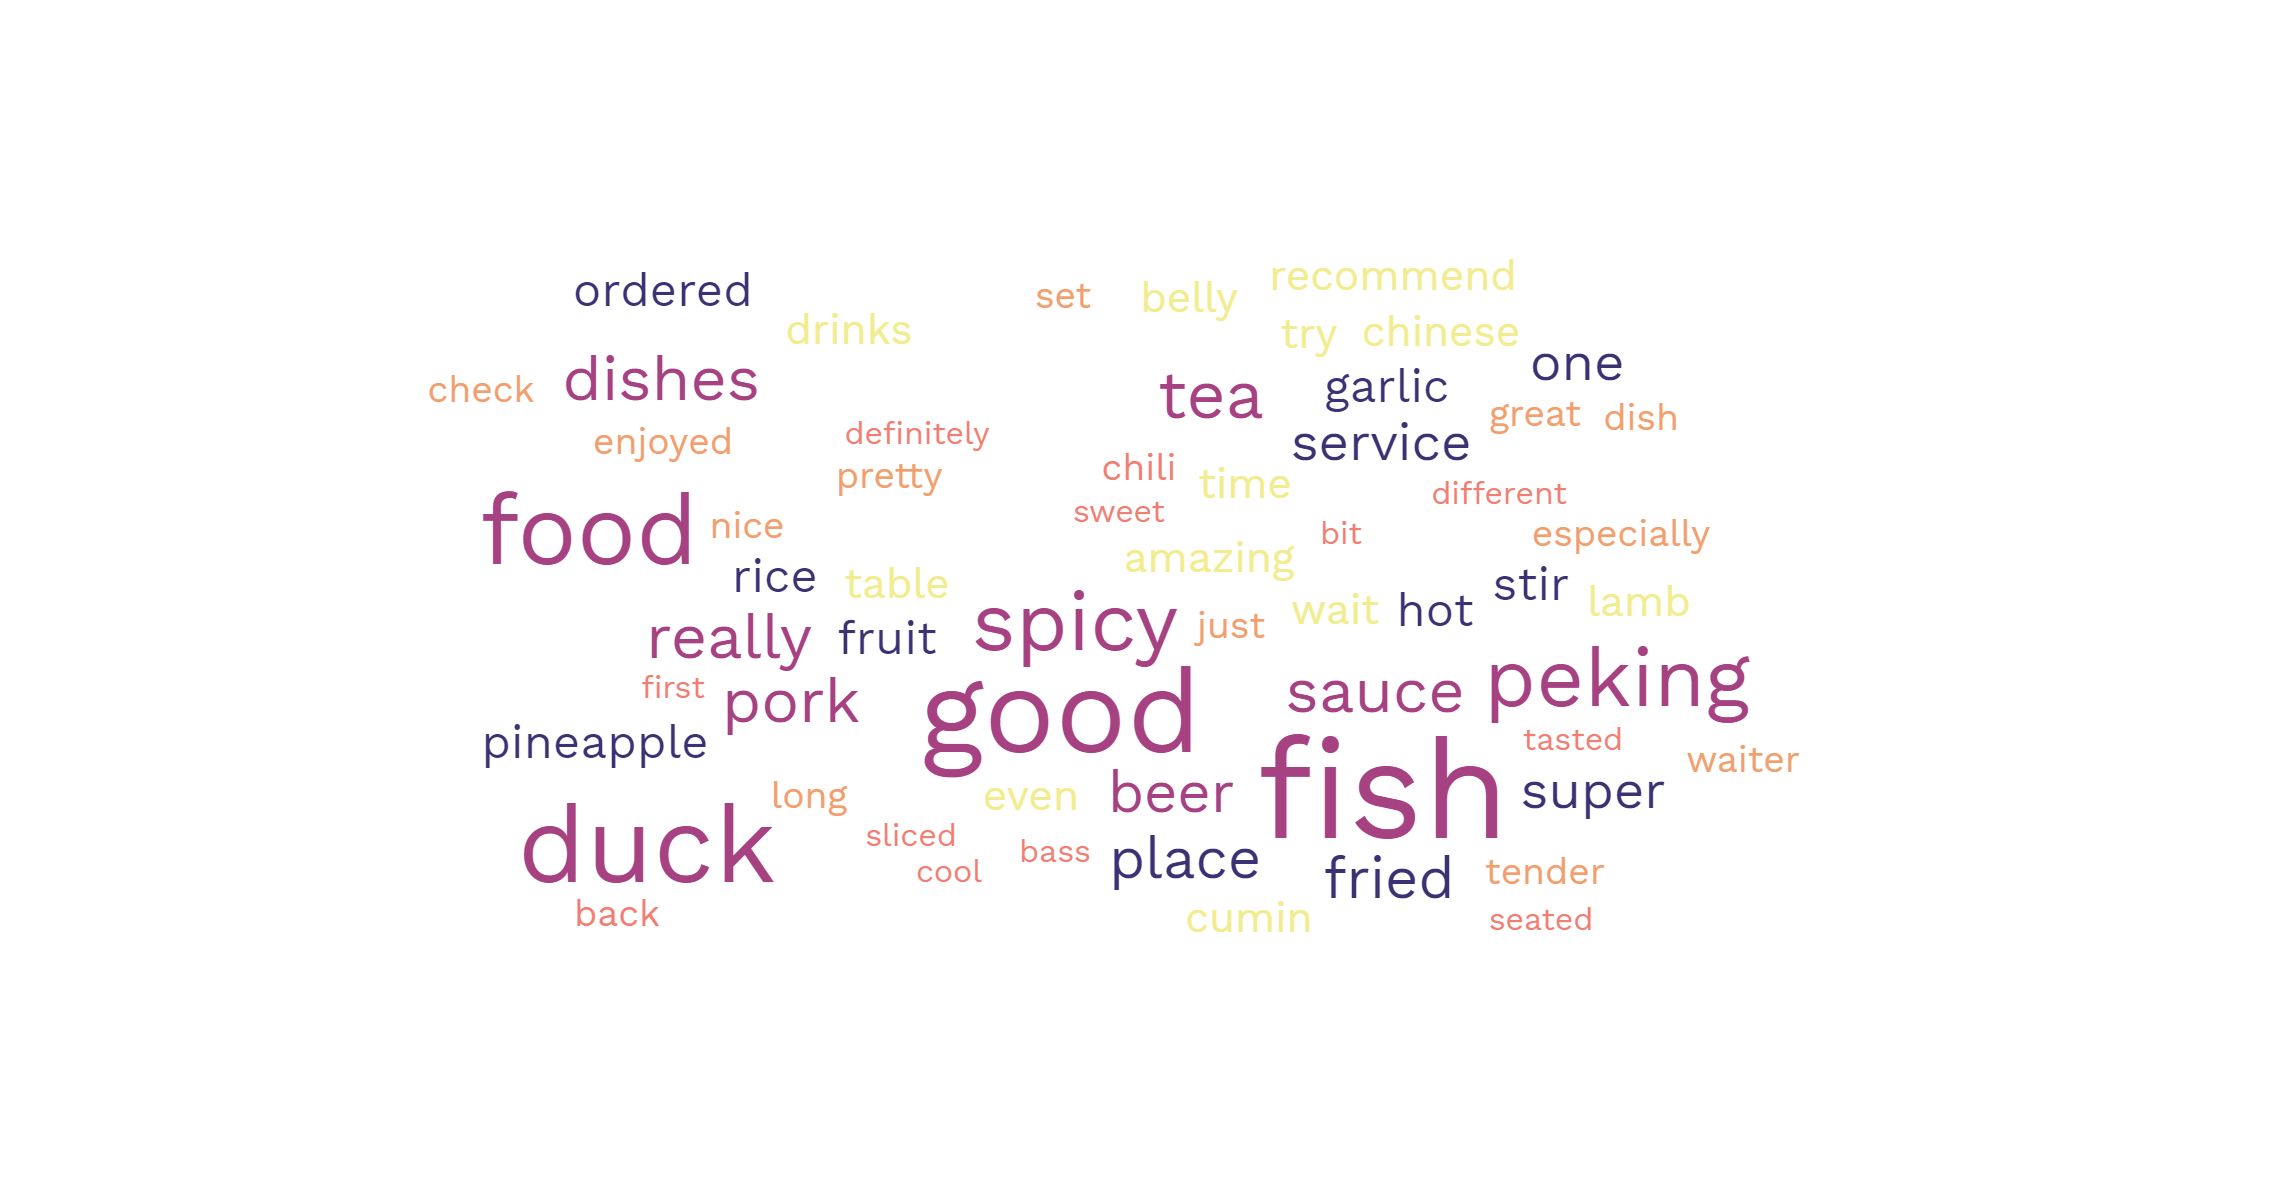